In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# download the required pacakges
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 7.2 MB/s 
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 1.6 MB 53.2 MB/s 
     |████████████████████████████████| 5.8 MB 53.0 MB/s 
     |████████████████████████████████| 438 kB 35.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninst

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/MAMI'

test  test.zip	train  training.zip  trial  trial.zip


In [ ]:
# import zipfile
 
# zip_file = "/content/drive/MyDrive/Colab Notebooks/MAMI/training.zip"
 
# try:
#     with zipfile.ZipFile(zip_file) as z:
#         z.extractall("/content/drive/MyDrive/Colab Notebooks/MAMI/train")
#         print("Extracted all")
# except:
#         print("Invalid file")

In [ ]:
#import zipfile
 
#zip_file = "/content/drive/MyDrive/Colab Notebooks/MAMI/test.zip"
 
#try:
#   with zipfile.ZipFile(zip_file) as z:
#        z.setpassword(pwd = bytes('*MaMiSemEval2022!', 'utf-8'))
#        z.extractall("/content/drive/MyDrive/Colab Notebooks/MAMI/test")
#         print("Extracted all")
#except:
#    print("Invalid file")

In [ ]:
#import zipfile
 
#zip_file = "/content/drive/MyDrive/Colab Notebooks/MAMI/trial.zip"
 
#try:
#    with zipfile.ZipFile(zip_file) as z:
#         z.setpassword(pwd = bytes('*MaMiSemEval2022!', 'utf-8'))
#         z.extractall("/content/drive/MyDrive/Colab Notebooks/MAMI/trial")
#         print("Extracted all")
#except:
#     print("Invalid file")

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/MAMI/train/TRAINING/training.csv'

'/content/drive/MyDrive/Colab Notebooks/MAMI/train/TRAINING/training.csv'


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/MAMI/trial/Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET'

1012.jpg  122.jpg   1380.jpg  191.jpg  349.jpg	524.jpg  719.jpg  919.jpg
1032.jpg  1236.jpg  1381.jpg  207.jpg  381.jpg	525.jpg  739.jpg  922.jpg
1047.jpg  1263.jpg  1384.jpg  216.jpg  383.jpg	565.jpg  741.jpg  925.jpg
104.jpg   126.jpg   1408.jpg  230.jpg  415.jpg	571.jpg  788.jpg  960.jpg
1078.jpg  1285.jpg  142.jpg   236.jpg  441.jpg	576.jpg  822.jpg  977.jpg
1094.jpg  1294.jpg  1440.jpg  246.jpg  442.jpg	58.jpg	 828.jpg  97.jpg
1132.jpg  1309.jpg  156.jpg   247.jpg  447.jpg	625.jpg  840.jpg  980.jpg
1146.jpg  1310.jpg  157.jpg   274.jpg  448.jpg	643.jpg  854.jpg  981.jpg
1159.jpg  1327.jpg  161.jpg   282.jpg  482.jpg	656.jpg  859.jpg  989.jpg
1174.jpg  133.jpg   162.jpg   28.jpg   491.jpg	666.jpg  865.jpg  trial.csv
1175.jpg  1354.jpg  165.jpg   300.jpg  492.jpg	670.jpg  872.jpg
1181.jpg  1363.jpg  175.jpg   30.jpg   519.jpg	700.jpg  899.jpg
1229.jpg  1377.jpg  181.jpg   33.jpg   520.jpg	717.jpg  89.jpg


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/MAMI/test/test/Test.csv'

'/content/drive/MyDrive/Colab Notebooks/MAMI/test/test/Test.csv'


In [ ]:
import pandas as pd
import re
import numpy as np
import itertools
import collections
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('treebank')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import tensorflow as tf

from gensim.models import Word2Vec

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Reading the csv file into a dataframe
training_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MAMI/train/TRAINING/training.csv",'\t')
trial_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MAMI/trial/Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/trial.csv",'\t')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MAMI/test/test/Test.csv','\t')
# Printing the first five elements in the dataframe
print(training_data.head())
print(trial_data.head())


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


   file_name  misogynous  shaming  stereotype  objectification  violence  \
0      1.jpg           0        0           0                0         0   
1     10.jpg           1        0           0                0         1   
2   1000.jpg           0        0           0                0         0   
3  10000.jpg           0        0           0                0         0   
4  10006.jpg           0        0           0                0         0   

                                  Text Transcription  
0                                      Milk Milk.zip  
1  ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...  
2  BREAKING NEWS: Russia releases photo of DONALD...  
3                       MAN SEEKING WOMAN Ignad 18 O  
4  Me explaining the deep lore of. J.R.R. Tolkein...  
  file_name  misogynous  shaming  stereotype  objectification  violence  \
0    28.jpg           0        0           0                0         0   
1    30.jpg           0        0           0                0  

In [ ]:
print(test_data.head())

   file_name                                 Text Transcription
0  15236.jpg  FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...
1  15805.jpg    SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?
2  16254.jpg         WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN
3  16191.jpg  Photographing something you want to show every...
4  15952.jpg  HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...


In [ ]:
# Preprocessing - removing unwanted characters, tokenization, stop-word removal
def preprocess_data(tweet):
    user_name = '@[A-Za-z0-9]+' # Pattern for matching the user names in the tweet
    has_tag = '#[A-Za-z0-9]+' # Pattern for matching the hasgtags in the tweer
    url = 'https?:\/\/[A-Za-z0-9\.\/\-]+' # Pattern for matching the URLs in the tweet
    
    x = tweet.lower()  # Lower casing all the characters
    #x = re.sub(user_name, '@USER', x)  # Replace the username with @USER word -> Optional
    x = re.sub(user_name, '', x) # Replace the username with an empty characrer
    #x = re.sub(has_tag,'HASH',x) # Replace the hashtags with HASH word -> Optional
    x = re.sub(has_tag,'',x) # Replace the hashtags with an empty characrer
    #x = re.sub(url, 'URL', x) # Replace the URLs with URL word -> Optional
    x = re.sub(url, '', x) # Replace the URLs with an empty characrer
    x = re.sub("[^a-zA-Z0-9]", " ",x) # Replace all the characters except alphabets and digits from the tweet
    x = re.sub("rt\s+",'',x) # Replace the retweet character "rt" from the tweet
  
    tokens = word_tokenize(x) # Tokenization; splitting the text into tokens
    # negation_words = ["mustn't", "won't",'wouldn', 'doesn', "aren't","needn't",'hasn','needn', "weren't",
    #               'didn','wasn','no', 'hadn', "doesn't",'aren',  "shouldn't",'don','ain',"haven't", 'couldn',
    #               'mightn',"mightn't", 'not', "wouldn't", "hasn't", "shan't", "wasn't", "couldn't", 'won',
    #               'shouldn', 'isn', "didn't", 'haven', 'nor' "don't", "hadn't", "isn't", 'weren']

    stop_words = set(stopwords.words("english")) # Removing the most frequently occurring words (stop words) from the text               
    words = [w for w in tokens if not w in stop_words] 

    return(" ".join(words)) # Combine the tokenized words to form a sentence

In [ ]:
training_data['Text Transcription'] = training_data['Text Transcription'].apply(lambda x: preprocess_data(x)) # Apply the clean_data() to all the entries in the dataframe
print(training_data.head())
trial_data['Text Transcription'] = trial_data['Text Transcription'].apply(lambda x: preprocess_data(x)) # Apply the clean_data() to all the entries in the dataframe
print(trial_data.head())
test_data['Text Transcription'] = test_data['Text Transcription'].apply(lambda x: preprocess_data(x)) # Apply the clean_data() to all the entries in the dataframe
print(test_data.head())

   file_name  misogynous  shaming  stereotype  objectification  violence  \
0      1.jpg           0        0           0                0         0   
1     10.jpg           1        0           0                0         1   
2   1000.jpg           0        0           0                0         0   
3  10000.jpg           0        0           0                0         0   
4  10006.jpg           0        0           0                0         0   

                                  Text Transcription  
0                                      milk milk zip  
1  roses red violets blue say yes rape quickmeme com  
2  breaking news russia releases photo donald tru...  
3                         man seeking woman ignad 18  
4  explaining deep lore j r r tolkein world arda ...  
  file_name  misogynous  shaming  stereotype  objectification  violence  \
0    28.jpg           0        0           0                0         0   
1    30.jpg           0        0           0                0  

In [ ]:
# Converting the dataframe into list
training_reviews = training_data['Text Transcription'].tolist()
sentiment = training_data['misogynous'].tolist()

le = LabelEncoder()
labels = le.fit_transform(sentiment)
#Y = le.fit_transform(sentiment)
#labels = tf.keras.utils.to_categorical(labels)
tr_labels=sentiment
test_reviews = trial_data['Text Transcription'].tolist()
te_labels = trial_data['misogynous'].tolist()
new_test_reviews = test_data['Text Transcription'].tolist()

In [ ]:
set(tr_labels)

{0, 1}

In [ ]:
# training_reviews, test_reviews, tr_labels, te_labels = train_test_split(reviews, Y, 
#                                                                                 test_size=0.20, 
#                                                                                 random_state=42
#                                                                                 )

training_labels, test_labels = tf.keras.utils.to_categorical(tr_labels), tf.keras.utils.to_categorical(te_labels)

In [ ]:
test_labels[0:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
print ("Number of training reviews is: ", len(training_reviews))
print ("Number of test reviews is: ", len(test_reviews))

Number of training reviews is:  10000
Number of test reviews is:  100


In [ ]:
vocab_size = 4000  # number of words to keep. This number has to be the number of unique words in the corpus. 
embedding_dim = 100 # Dimension of the vector representation for each word 

max_length = 0 # Length of the lengthiest tweet
for i in range(len(training_data['Text Transcription'])):
  x = word_tokenize(training_data['Text Transcription'][i])
  if len(x) >  max_length:
    max_length = len(x)
    
print("max_length = {}".format(max_length))
oov_tok = "<OOV>"  # Token to represent Out-of-Vocabulary words

max_length = 166


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index

In [ ]:
# Pad the sequences so that they are all the same length
training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = tf.keras.preprocessing.sequence.pad_sequences(training_sequences,maxlen=max_length, 
                                                                padding='pre')

test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences,maxlen=max_length)

In [ ]:
training_padded[0:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
test_padded[0:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix




##BERT Model

In [ ]:
# import the libraries
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

## Load the data

## Data Summary and Preprocessing

In [ ]:
# checking if the classes are balanced
training_data['misogynous'].value_counts()

0    5000
1    5000
Name: misogynous, dtype: int64

In [ ]:
#The classes are evenly distributed (i.e. balanced class).

In [ ]:
# splitting the data into train and test set
from sklearn.model_selection import train_test_split
df=training_data
df1=trial_data
X_train, X_test, y_train, y_test = df['Text Transcription'],df1['Text Transcription'],df['misogynous'],df1['misogynous']

In [ ]:
# downloading the pre-trained BERT model from tfhub
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Functional model below.

In [ ]:
# initializing BERT layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') # input layer
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# initializing NN layers

### The Dropout layer randomly sets input units to 0 with a frequency of rate at 
### each step during training time, which helps prevent overfitting
### Source: https://keras.io/api/layers/regularization_layers/dropout/
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output']) # 0.1% neuron is dropped out randomly
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l) # 1 neuron tells if the text is misogynous or not (i.e. 1 or 0)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

## Model Training

In [ ]:
# accuracy metrics
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [56]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
313/313 [==============================] - 104s 333ms/step - loss: 0.6196 - accuracy: 0.6579 - precision: 0.6599 - recall: 0.6518 - val_loss: 0.5595 - val_accuracy: 0.7800 - val_precision: 0.7750 - val_recall: 0.7045
Epoch 2/20
313/313 [==============================] - 103s 331ms/step - loss: 0.6170 - accuracy: 0.6577 - precision: 0.6619 - recall: 0.6448 - val_loss: 0.5615 - val_accuracy: 0.8000 - val_precision: 0.9000 - val_recall: 0.6136
Epoch 3/20
313/313 [==============================] - 103s 330ms/step - loss: 0.6146 - accuracy: 0.6596 - precision: 0.6613 - recall: 0.6544 - val_loss: 0.5521 - val_accuracy: 0.7900 - val_precision: 0.8286 - val_recall: 0.6591
Epoch 4/20
313/313 [==============================] - 104s 331ms/step - loss: 0.6184 - accuracy: 0.6574 - precision: 0.6584 - recall: 0.6542 - val_loss: 0.5615 - val_accuracy: 0.7400 - val_precision: 0.6875 - val_recall: 0.7500
Epoch 5/20
313/313 [==============================] - 103s 330ms/step - loss: 0.6108 - a

In [57]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 233ms/step - loss: 0.5411 - accuracy: 0.8000 - precision: 0.8000 - recall: 0.7273


In [58]:
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')

loss: 0.5411368608474731
accuracy: 0.800000011920929
precision: 0.800000011920929
recall: 0.7272727489471436


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


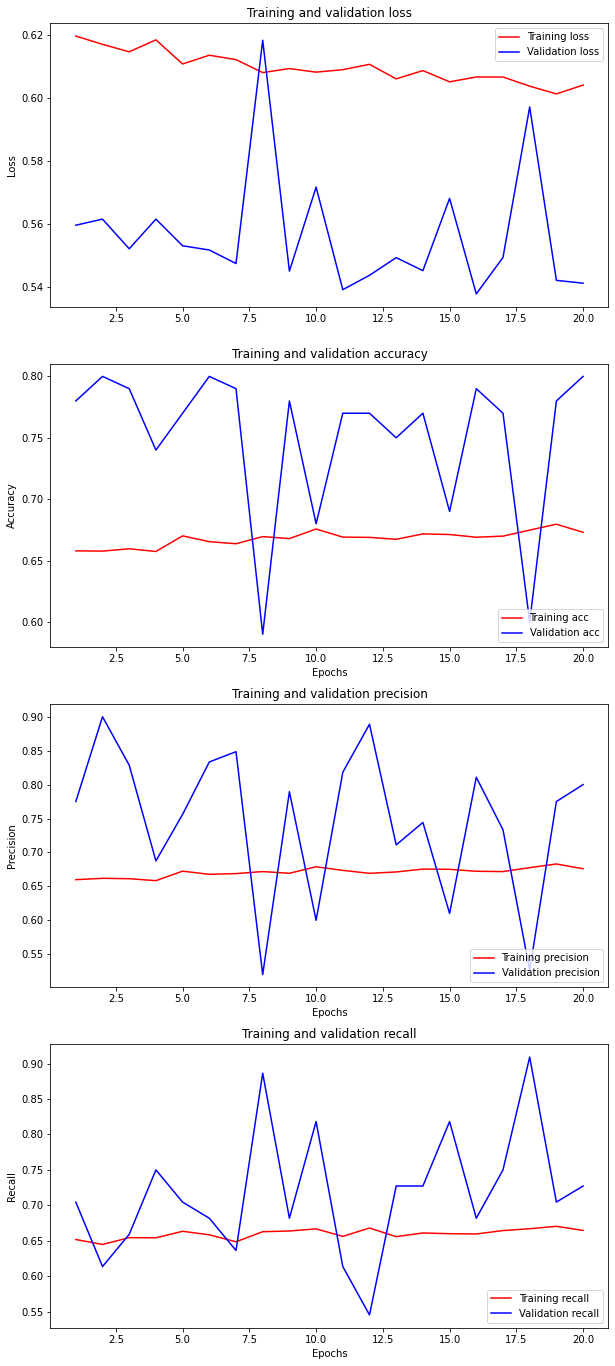

In [59]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
lo = history_dict['loss']
val_lo = history_dict['val_loss']
prec = history_dict['precision']
val_prec = history_dict['val_precision']
rec = history_dict['recall']
val_rec = history_dict['val_recall']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 24))
fig.tight_layout()

plt.subplot(4, 1, 1)
# r is for "solid red line"
plt.plot(epochs, lo, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_lo, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(4, 1, 3)
plt.plot(epochs, prec, 'r', label='Training precision')
plt.plot(epochs, val_prec, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')

plt.subplot(4, 1, 4)
plt.plot(epochs, rec, 'r', label='Training recall')
plt.plot(epochs, val_rec, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')